In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
df_00 = pd.read_csv('data/preproced_data.csv')
df_00.shape

(19112, 398)

In [29]:
df_01 = df_00.dropna()
df_01.shape

(18976, 398)

In [30]:
tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(df_01.drop(['title'],axis=1))

In [31]:
df_tsne = pd.DataFrame(X_tsne, columns=['x','y'])

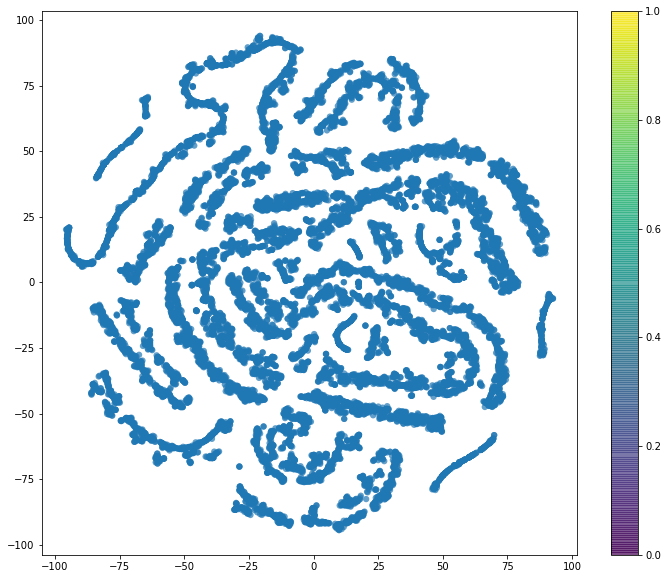

In [32]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

# DBSCAN

In [33]:
clustering = DBSCAN(eps=1.2, min_samples=2).fit(X_tsne)

In [34]:
df_tsne['DBSCAN_clusters'] = clustering.labels_

In [35]:
len(df_tsne['DBSCAN_clusters'].unique())

308

In [36]:
df_tsne['DBSCAN_clusters'].value_counts()

118    433
89     404
143    360
54     358
38     357
      ... 
212      2
291      2
195      2
115      2
303      2
Name: DBSCAN_clusters, Length: 308, dtype: int64

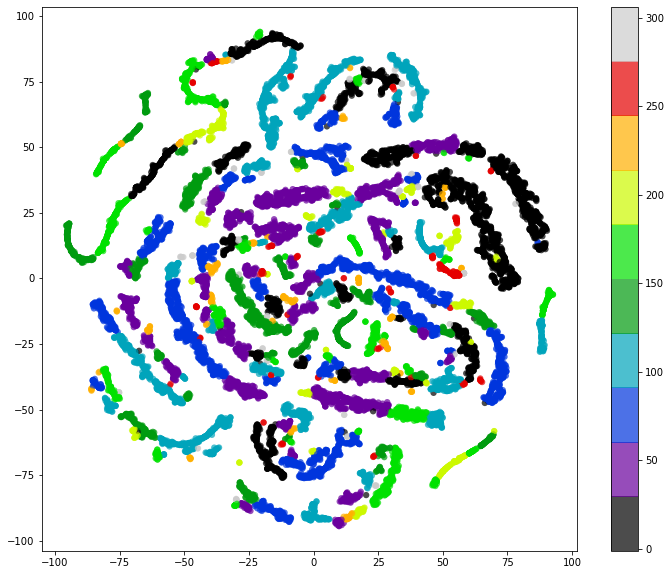

In [37]:
plt.figure(figsize=(12,10))
plt.scatter(df_tsne.iloc[:, 0],df_tsne.iloc[:, 1], c=df_tsne['DBSCAN_clusters'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

In [38]:
df_tsne['DBSCAN_clusters'].value_counts()[:21]

118    433
89     404
143    360
54     358
38     357
4      339
24     321
81     307
101    292
91     291
64     281
11     274
105    273
117    264
155    251
17     240
99     237
0      233
18     230
57     221
25     220
Name: DBSCAN_clusters, dtype: int64

In [55]:
cluster_num = 118
cluster_1 = df_tsne[df_tsne['DBSCAN_clusters'] ==cluster_num]
print(cluster_1.shape)
cluster_2 = df_tsne[df_tsne['DBSCAN_clusters'] !=cluster_num]
cluster_2.shape

(433, 4)


(18543, 4)

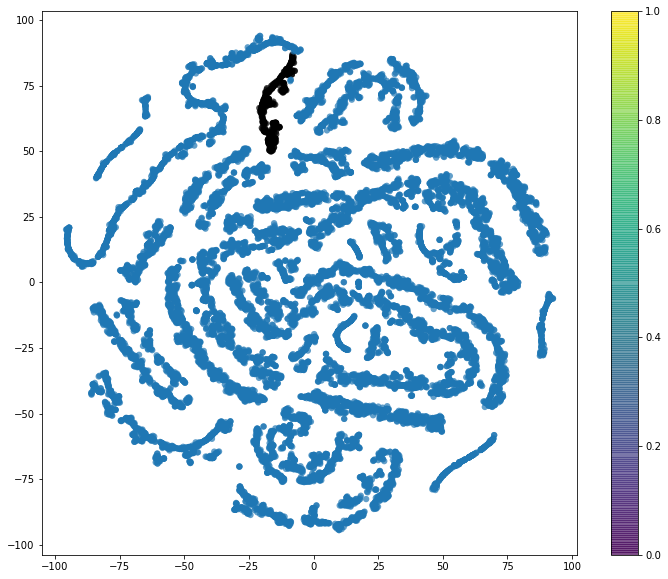

In [56]:
plt.figure(figsize=(12,10))
plt.scatter(cluster_1.iloc[:, 0],cluster_1.iloc[:, 1], c=cluster_1['DBSCAN_clusters'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(cluster_2.iloc[:, 0],cluster_2.iloc[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

# Agglomerative

In [41]:
Agglo_cluster = AgglomerativeClustering(n_clusters=300).fit(X_tsne)

In [42]:
df_tsne['aglo'] = Agglo_cluster.labels_

In [43]:
len(df_tsne['aglo'].unique())

300

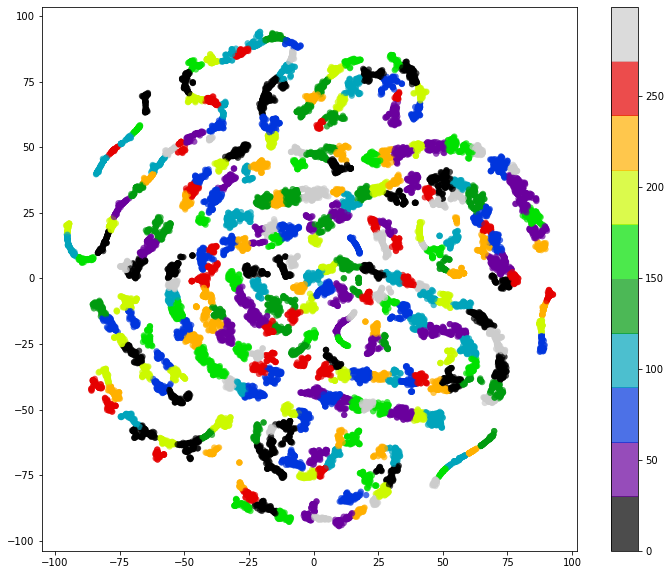

In [44]:
plt.figure(figsize=(12,10))
plt.scatter(df_tsne.iloc[:, 0],df_tsne.iloc[:, 1], c=df_tsne['aglo'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

# Recommendation System

In [57]:
df_recommend = df_tsne.copy()
df_recommend['title'] = df_00['title']
df_recommend = df_recommend.drop(['x','y'],axis=1).sort_values(['DBSCAN_clusters'],ascending=True)

In [58]:
df_recommend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18976 entries, 635 to 18563
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DBSCAN_clusters  18976 non-null  int64 
 1   aglo             18976 non-null  int64 
 2   title            18976 non-null  object
dtypes: int64(2), object(1)
memory usage: 593.0+ KB


In [59]:
df_recommend.sample(10)

,DBSCAN_clusters,aglo,title
8308,169,41,Video Track Annual 2022
6143,57,228,The Village
1578,44,189,The Fresh Prince of Bel-Air
16726,155,157,24: Redemption
7847,18,30,Gekidol
2964,233,171,Toradora!
10278,79,59,Match of the Day
7758,118,192,Dragon Ball
5021,0,36,Irina: The Vampire Cosmonaut
7617,22,150,The Spy Who Dumped Me


In [60]:
df_recommend.DBSCAN_clusters.value_counts()[:50]

118    433
89     404
143    360
54     358
38     357
4      339
24     321
81     307
101    292
91     291
64     281
11     274
105    273
117    264
155    251
17     240
99     237
0      233
18     230
57     221
25     220
51     216
71     213
9      210
175    194
120    188
132    183
41     179
78     177
151    176
50     175
67     174
80     174
104    163
52     163
183    153
20     152
112    150
23     149
93     146
145    146
28     142
62     142
160    141
88     141
40     130
34     130
55     128
74     126
126    124
Name: DBSCAN_clusters, dtype: int64

In [49]:
liked_movie_title = 'Ip Man 3'

In [50]:
liked_movie_cluster = df_recommend['DBSCAN_clusters'][df_recommend.title == liked_movie_title].values.tolist()[0]
df_recommend['title'][df_recommend.DBSCAN_clusters == liked_movie_cluster].values.tolist()

['Jumanji: The Next Level',
 'Celebrity Hunted Manhunt Italy',
 'Cinderella',
 'Travel Man: 48 Hours in...',
 "KonoSuba – God's blessing on this wonderful world!!",
 '[REC]³ Genesis',
 'The Pacifier',
 'Free Willy',
 'Dream High',
 'My Sassy Girl',
 'Gugure! Kokkuri-san',
 'Enemy at the Gates',
 'Kung Fu Jungle',
 'TableTop',
 'The Adventures of Rocky & Bullwinkle',
 'Closest Love to Heaven',
 'Cyborg',
 'Game of Death',
 '乃木坂って、どこ?',
 'The Resistance Banker',
 'Host',
 'Final Score',
 'Digimon Tamers',
 'Compact',
 'The Accountant',
 'The Swan Princess: A Royal Wedding',
 'My Teen Romantic Comedy SNAFU',
 'Witch Hunt',
 'Death Wish 3',
 "I'll Be Home for Christmas",
 'El sexo sentido',
 'Melancholia',
 'Live Telecast',
 'My Date with a Vampire',
 'Out of Sight',
 'USS Indianapolis: Men of Courage',
 'Gabriel',
 'The Bonfire of Destiny',
 'Emperor',
 'Pacific Rim',
 "The King's Avatar: For the Glory",
 'Rudderless',
 'For Better or Worse',
 'Banana',
 'Baby Blues',
 'Mrs. Fazilet and H

In [51]:
def find_movies(liked_movie_title):
    liked_movie_cluster = df_recommend['DBSCAN_clusters'][df_recommend.title == liked_movie_title].values.tolist()[0]
    return df_recommend['title'][df_recommend.DBSCAN_clusters == liked_movie_cluster].values.tolist()
    

In [52]:
find_movies('A Ghost Story')

['The Do-Over',
 'Requiem of the Rose King',
 'Chappaquiddick',
 'Salvage Hunters',
 'Love Twist',
 'Zorro',
 'Warriors of the Rainbow: Seediq Bale - Part 2: The Rainbow Bridge',
 'Bulletproof Monk',
 'Legacies',
 'SCHOOL-LIVE!',
 'Alien TV',
 'For Life',
 'Dragons Rescue Riders: Heroes of the Sky',
 'Bloodsport',
 'A Ghost Story',
 'Um Lugar ao Sol',
 'The Beguiled',
 'Young Justice Bao']